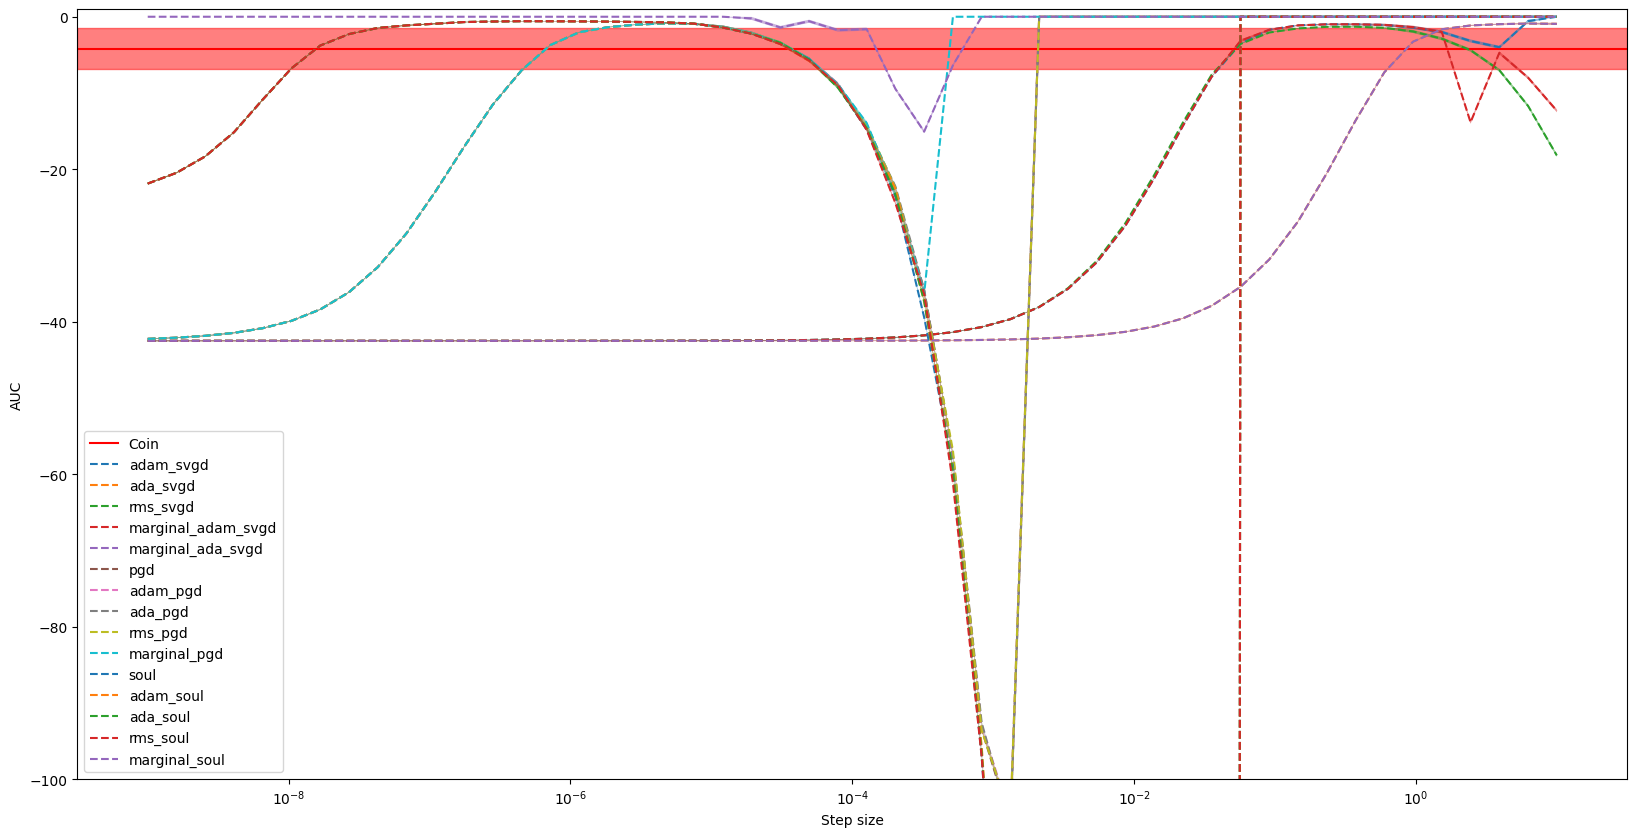

In [52]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap

import pickle

import matplotlib.pyplot as plt

#for name in ["Boston", "Concrete", "Energy", "Kin8nm"]: #, "Naval", "Power", "Protein", "Wine", "Yacht"]

#name = "Wisconsin"
name = "Covertype"
# name = "Banknote"
# name = "Cleveland"
# name = "Haberman"

with open(f"results/{name}.pkl","rb") as f:
    data = pickle.load(f)


step_sizes = data["step_sizes"]

metric = "lppd"
nan_number = 0.0

coin_svgd = jnp.array(data[metric]["coin_svgd"]) # Repetitions, by iterations
marginal_coin_svgd = jnp.array(data[metric]["marginal_coin_svgd"]) # Repetitions, by iterations



thresh = 30
fig, ax = plt.subplots(figsize=(20, 10))

# Plot coin
ax.axhline(coin_svgd.mean(axis=0), label="Coin", color = "red")
ax.axhspan(coin_svgd.mean(axis=0) - coin_svgd.std(axis=0), coin_svgd.mean(axis=0) + coin_svgd.std(axis=0), alpha=0.5, color = "red")

for alg_name in data[metric].keys():

    

    if "coin" in alg_name:
        continue

    values = jnp.nan_to_num(jnp.array(data[metric][alg_name]).reshape((-1, step_sizes.shape[0])), nan=nan_number) # Learnrates, by repetitions

    ax.plot(step_sizes, values.mean(axis=0),  "--", label=f"{alg_name}")
    ax.fill_between(step_sizes, values.mean(axis=0) - jnp.minimum(values.std(axis=0), thresh), values.mean(axis=0) + jnp.minimum(values.std(axis=0), thresh), alpha=0.5)


plt.xscale('log')
plt.xlabel('Step size')
plt.ylabel('AUC')
plt.legend()


#plt.ylim(0.5, 1.05 * coin_svgd.mean())
plt.ylim(-100, 1)

plt.savefig(f"results/{name}_auc.pdf", bbox_inches='tight')

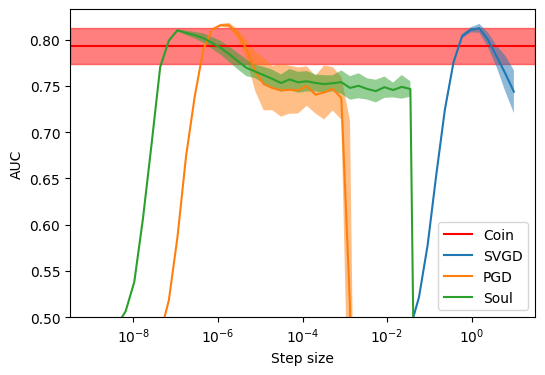

In [8]:




# # Plot adam
# ax.plot(step_sizes, adam[:,:,i].mean(axis=0), label='Adam SVGD')
# ax.fill_between(step_sizes, adam[:,:,i].mean(axis=0) - jnp.minimum(adam[:,:,i].std(axis=0), thresh), adam[:,:,i].mean(axis=0) + jnp.minimum(adam[:,:,i].std(axis=0), thresh), alpha=0.5)

# Plot ada


# Plot pgd
ax.plot(step_sizes, pgd.mean(axis=0), label='PGD')
ax.fill_between(step_sizes, pgd.mean(axis=0) - jnp.minimum(pgd.std(axis=0), thresh), pgd.mean(axis=0) + jnp.minimum(pgd.std(axis=0), thresh), alpha=0.5)

# Plot soul
ax.plot(step_sizes, soul.mean(axis=0), label='Soul')
ax.fill_between(step_sizes, soul.mean(axis=0) - jnp.minimum(soul.std(axis=0), thresh), soul.mean(axis=0) + jnp.minimum(soul.std(axis=0), thresh), alpha=0.5)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_ticks([0.98, 0.99, 1.00])

plt.xscale('log')
plt.xlabel('Step size')
plt.ylabel('AUC')
plt.legend()

plt.ylim(0.5, 1.05 * coin.mean())

plt.savefig(f"results/{name}_auc.pdf", bbox_inches='tight')